# Problem Set 3:

### Question 1:
Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men. 

In [18]:
import pandas as pd

# Step 2, 3
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user" 
users = pd.read_csv(url, sep='|')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [19]:
# Step 4: Mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [20]:
# Step 5: Male ratio per occupation
male_ratio = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio = male_ratio.sort_values(ascending=False)
male_ratio

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [21]:
# Step 6: Min and max age per occupation:
age_range = users.groupby('occupation')['age'].agg(['min', 'max'])
age_range

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [25]:
# Step 7: Mean age per occupation and gender
mean_age_gender = users.groupby(['occupation', 'gender'])['age'].mean().unstack()
mean_age_gender

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [24]:
# Step 8: Percentage of women and men per occupation
gender_percentage = users.groupby(['occupation', 'gender']).size() / users.groupby(['occupation']).size() * 100
gender_percentage = gender_percentage.unstack()
gender_percentage

gender,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


### Question 2:
Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [26]:
# Step 3 
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [27]:
# Step 4: Only Goals column
goals = euro12['Goals']
goals.head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [49]:
# Step 5-6: 
num_teams = euro12['Team'].nunique() # Step 5 
num_columns = euro12.shape[1] # Step 6 

num_teams, num_columns

(16, 35)

In [70]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']] # Step 7
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [68]:
sorted_team_by_card = euro12.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False]) # Step 8
sorted_team_by_card

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [69]:
mean_yellow_card_per_team = euro12['Yellow Cards'].mean() # Step 9
mean_yellow_card_per_team

np.float64(7.4375)

In [75]:
# Step 10-14
team_more_6_goals = euro12[euro12['Goals'] > 6] # Step 10
team_start_with_G = euro12[euro12['Team'].str.startswith('G')] # Step 11

team_more_6_goals, team_start_with_G

(       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
 5   Germany     10               32                32             47.8%   
 13    Spain     12               42                33             55.9%   
 
    % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
 5             15.6%                          80             2              1   
 13            16.0%                         100             0              1   
 
     Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
 5                      0  ...          10                 62.6%         63   
 13                     0  ...          15                 93.8%        102   
 
    Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
 5              49        12             4          0       15        15   
 13             83        19            11          0       17        17   
 
     Players Used  
 5             17  
 13            1

In [72]:
first_7_columns = euro12.iloc[:, :7] # Step 12
first_7_columns


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [74]:
all_but_last_3 = euro12.iloc[:, :-3] # Step 13
all_but_last_3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [76]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]['Shooting Accuracy'] # Step 14
shooting_accuracy

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

### Question 3:
Housing
Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [81]:
# Step 1
import numpy as np

# Step 2:
series_1 = pd.Series(np.random.randint(1, 5, 100))
series_2 = pd.Series(np.random.randint(1, 4, 100))
series_3 = pd.Series(np.random.randint(10000, 30000, 100))


In [82]:
# Step 3:
df = pd.DataFrame({'series_1': series_1, 'series_2': series_2, 'series_3': series_3})
df.head()

,series_1,series_2,series_3
0,1,1,19223
1,3,2,11495
2,1,3,27759
3,2,3,14897
4,2,1,14221


In [83]:
# Step 4: 
column_name = ['bedrs', 'bathrs', 'price_sqr_meter']
df.columns = column_name
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,19223
1,3,2,11495
2,1,3,27759
3,2,3,14897
4,2,1,14221


In [93]:
# Step 5:
bigcolumn = pd.concat([series_1, series_2, series_3])
bigcolumn

0         1
1         3
2         1
3         2
4         2
      ...  
95    12834
96    19645
97    25837
98    12635
99    23822
Length: 300, dtype: int64

In [94]:
# Step 6: Yes it is True, the index is going only until 99
# Step 7:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn


0          1
1          3
2          1
3          2
4          2
       ...  
295    12834
296    19645
297    25837
298    12635
299    23822
Length: 300, dtype: int64

### Question 4:
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL

61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04

61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83

61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.

A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days

A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.

A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [13]:
import pandas as pd
# Load dataset
df_wind = pd.read_csv('./datasets/wind.txt', delim_whitespace=True)
data = df_wind
data.head()

/var/folders/qq/q7zb_56n3nd0hngl2qjjdt2c0000gn/T/ipykernel_31827/2260642847.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_wind = pd.read_csv('./datasets/wind.txt', delim_whitespace=True)


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [14]:
# Step 3-5
def correct_year(year):
    return 1900 + year if year < 100 else year

data['Yr'] = data['Yr'].apply(correct_year)
data['Date'] = pd.to_datetime(
  dict(year = data['Yr'], month = data['Mo'], day = data['Dy'])
)
data.set_index('Date', inplace=True)
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [17]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
# Step 6
missing_values_per_location = data.isnull().sum()

# Step 7
total_non_missing_values = data.notnull().sum().sum()

# Step 8
mean_windspeeds = data.mean().mean()

# Step 9
loc_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=0)

# Step 10
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

missing_values_per_location, total_non_missing_values, mean_windspeeds, loc_stats, day_stats

(RPT    6
 VAL    3
 ROS    2
 KIL    5
 SHA    2
 BIR    0
 DUB    3
 CLA    2
 MUL    3
 CLO    1
 BEL    0
 MAL    4
 dtype: int64,
 np.int64(78857),
 np.float64(10.227982360836938),
             RPT        VAL        ROS        KIL        SHA        BIR  \
 min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
 max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
 mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
 std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   
 
             DUB        CLA        MUL        CLO        BEL        MAL  
 min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
 max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
 mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
 std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  ,
              min    max       mean       std
 Date               

In [31]:
# Step 11
january_data = data[data.index.month == 1]
average_windspeed_january = january_data.mean()

# Step 12
yearly_data = data.resample('Y').mean()

# Step 13
monthly_data = data.resample('M').mean()

# Step 14
weekly_data = data.resample('W').mean()

# Step 15
weekly_data_52 = weekly_data.iloc[:52].aggregate(['min', 'max', 'mean', 'std'])

average_windspeed_january, yearly_data, monthly_data, weekly_data, weekly_data_52

/var/folders/qq/q7zb_56n3nd0hngl2qjjdt2c0000gn/T/ipykernel_31827/2451478681.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').mean()
/var/folders/qq/q7zb_56n3nd0hngl2qjjdt2c0000gn/T/ipykernel_31827/2451478681.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


(RPT    14.847325
 VAL    12.914560
 ROS    13.299624
 KIL     7.199498
 SHA    11.667734
 BIR     8.054839
 DUB    11.819355
 CLA     9.512047
 MUL     9.543208
 CLO    10.053566
 BEL    14.550520
 MAL    18.028763
 dtype: float64,
                   RPT        VAL        ROS       KIL        SHA       BIR  \
 Date                                                                         
 1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
 1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
 1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
 1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
 1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
 1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
 1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
 1968-12-31  11.835628  10.468197  11.409754  6.477678  

### Question 5:
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

In [51]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [52]:
# Step 4-8
first_10 = chipo.head(10)
num_observations = chipo.shape[0]
num_columns = chipo.shape[1]
column_names = chipo.columns
dataset_index = chipo.index

first_10, num_observations, num_columns, column_names, dataset_index

(   order_id  quantity                              item_name  \
 0         1         1           Chips and Fresh Tomato Salsa   
 1         1         1                                   Izze   
 2         1         1                       Nantucket Nectar   
 3         1         1  Chips and Tomatillo-Green Chili Salsa   
 4         2         2                           Chicken Bowl   
 5         3         1                           Chicken Bowl   
 6         3         1                          Side of Chips   
 7         4         1                          Steak Burrito   
 8         4         1                       Steak Soft Tacos   
 9         5         1                          Steak Burrito   
 
                                   choice_description item_price  
 0                                                NaN     $2.39   
 1                                       [Clementine]     $3.39   
 2                                            [Apple]     $3.39   
 3             

In [53]:
# Step 9-12
most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
total_items_ordered = chipo['quantity'].sum()

most_ordered_item, most_ordered_quantity, most_ordered_choice, total_items_ordered

('Chicken Bowl', np.int64(761), '[Diet Coke]', np.int64(4972))

In [54]:
# Step 13-16
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
num_orders = chipo['order_id'].nunique()
average_revenue = total_revenue / num_orders

total_revenue, num_orders, average_revenue

(np.float64(39237.02), 1834, np.float64(21.39423118865867))

In [55]:
# Step 17
num_unique_items = chipo['item_name'].nunique()
num_unique_items

50

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


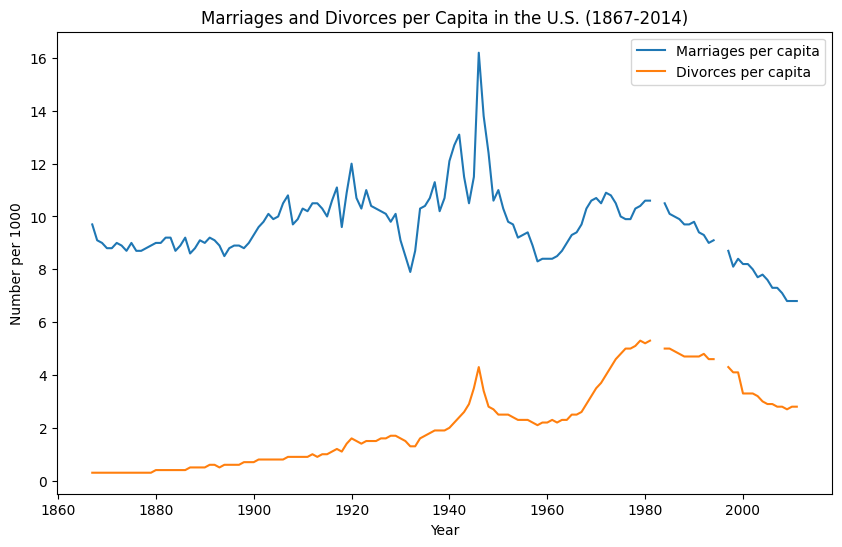

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

marriages_divorces_df = pd.read_csv('./datasets/us-marriages-divorces-1867-2014.csv')

# Example data
years = marriages_divorces_df['Year'] 
marriages = marriages_divorces_df['Marriages_per_1000']
divorces =  marriages_divorces_df['Divorces_per_1000']

plt.figure(figsize=(10, 6))

plt.plot(years, marriages, label="Marriages per capita")
plt.plot(years, divorces, label="Divorces per capita")

plt.xlabel('Year')
plt.ylabel('Number per 1000')

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.show()


### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!
04

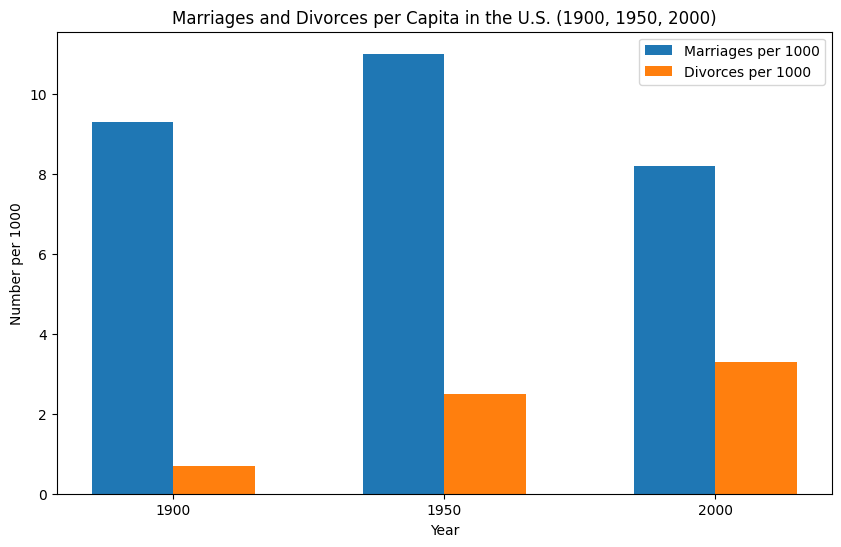

In [3]:
specific_years = marriages_divorces_df[marriages_divorces_df['Year'].isin([1900, 1950, 2000])]

plt.figure(figsize=(10, 6))

bar_width = 0.3
indices = range(len(specific_years))

plt.bar(indices, specific_years['Marriages_per_1000'], width=bar_width, label = 'Marriages per 1000')
plt.bar([i + bar_width for i in indices], specific_years['Divorces_per_1000'], width=bar_width, label='Divorces per 1000')

plt.xticks([i + bar_width / 2 for i in indices], specific_years['Year'])
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

plt.xlabel('Year')
plt.ylabel('Number per 1000')

plt.legend()
plt.show()



### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


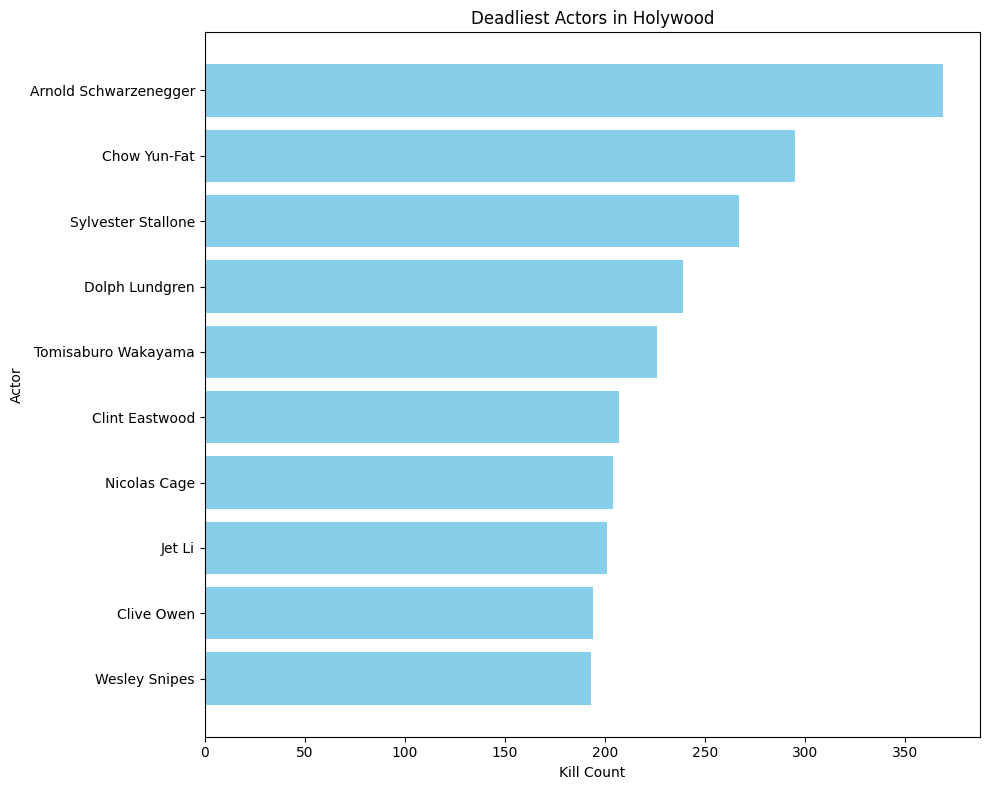

In [5]:
actor_kills = pd.read_csv('./datasets/actor_kill_counts.csv')
sorted_actors = actor_kills.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))

plt.barh(sorted_actors['Actor'], sorted_actors['Count'], color='skyblue')
plt.title('Deadliest Actors in Holywood')

plt.xlabel('Kill Count')
plt.ylabel('Actor')

plt.tight_layout()
plt.show()


### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


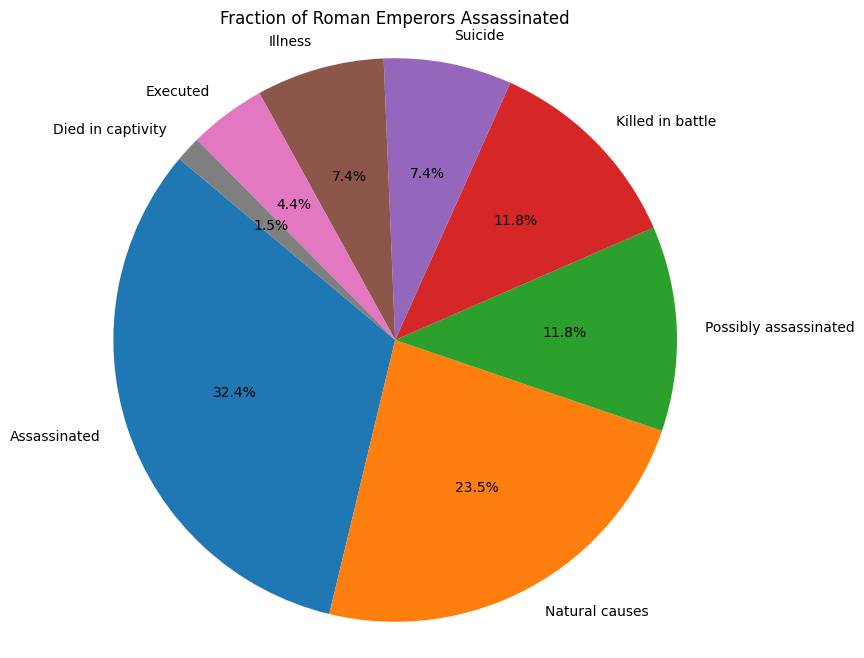

In [7]:
roman_emperror_reigns = pd.read_csv('./datasets/roman-emperor-reigns.csv')
cause_count = roman_emperror_reigns['Cause_of_Death'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(cause_count, labels = cause_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')
plt.show()

### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

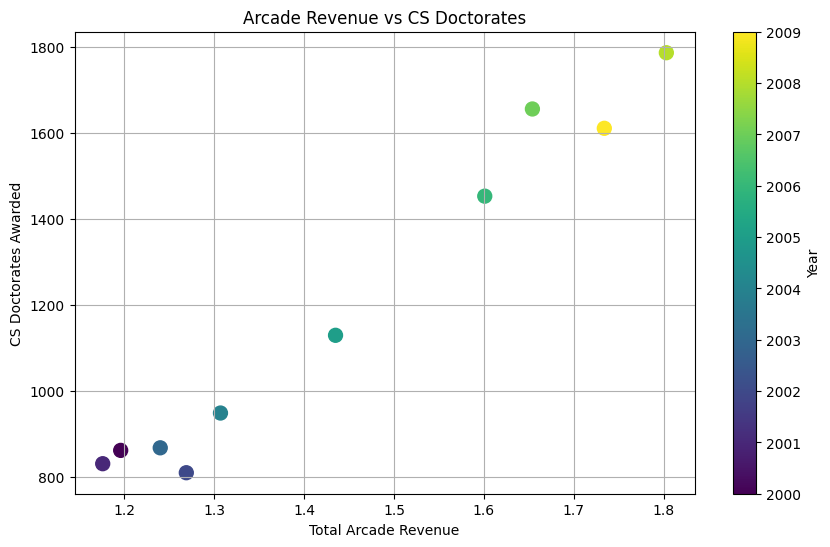

In [10]:
arcade_revenue_vs_cs = pd.read_csv('./datasets/arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10,6))
scatter = plt.scatter(arcade_revenue_vs_cs['Total Arcade Revenue (billions)'], arcade_revenue_vs_cs['Computer Science Doctorates Awarded (US)'], c=arcade_revenue_vs_cs['Year'], cmap='viridis', s=100)

plt.colorbar(scatter, label='Year')
plt.title('Arcade Revenue vs CS Doctorates')

plt.xlabel('Total Arcade Revenue')
plt.ylabel('CS Doctorates Awarded')

plt.grid(True)
plt.show()